In [22]:
import sys
from pathlib import Path
sys.path.append(Path("../modules/").absolute().__str__())

from data_utils import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

In [23]:
df = load_dataset(Path("../outputs/batch_run/experiment_basic_vs_template_2/concatened-evaluations.json"))
df.head()

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,...,get_nested_values_mean_average_precision,id_precision,id_recall,id_f1score,id_mean_average_precision,cross_precision,cross_recall,cross_f1score,cross_mean_average_precision,correct_syntax
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,227,9,80,0,197,197,90,503,...,0.070069,0.167513,0.076931,0.089180,0.073583,0.243655,0.113244,0.134726,0.100203,0.547758
1,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,46,12,29,0,426,426,403,503,...,0.001762,0.004695,0.002422,0.002491,0.002348,0.004695,0.002471,0.002582,0.002384,0.904483
2,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,46,15,22,0,430,430,406,503,...,0.005553,0.013953,0.008609,0.009312,0.007695,0.018605,0.009675,0.010769,0.007898,0.898635
3,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,172,17,96,0,228,228,102,503,...,0.090846,0.201754,0.118220,0.132241,0.103920,0.271930,0.153787,0.174954,0.144048,0.651072


In [24]:
df[['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty']]

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,gold_num_exec_timeout,gold_num_exec_fail,gold_num_exec_empty,gold_num_exec_to_eval,gold_num_eval_empty
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,227,9,80,0,197,197,90,503,10,0,0,503,19
1,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,46,12,29,0,426,426,403,503,10,0,0,503,19
2,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,46,15,22,0,430,430,406,503,10,0,0,503,19
3,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,172,17,96,0,228,228,102,503,10,0,0,503,19


In [25]:
print(df.columns)

Index(['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty', 'bleu_score', 'meteor_score', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'get_nested_values_precision',
       'get_nested_values_recall', 'get_nested_values_f1score',
       'get_nested_values_mean_average_precision', 'id_precision', 'id_recall',
       'id_f1score', 'id_mean_average_precision', 'cross_precision',
       'cross_recall', 'cross_f1score', 'cross_mean_average_precision',
       'correct_syntax'],
      dtype='object')


In [26]:
model_names = df["model_name"].map(lambda x: x[x.rfind("-", 0, x.rfind('-'))+1:])
model_names

0       template-basic
1       basic-template
2          basic-basic
3    template-template
Name: model_name, dtype: object

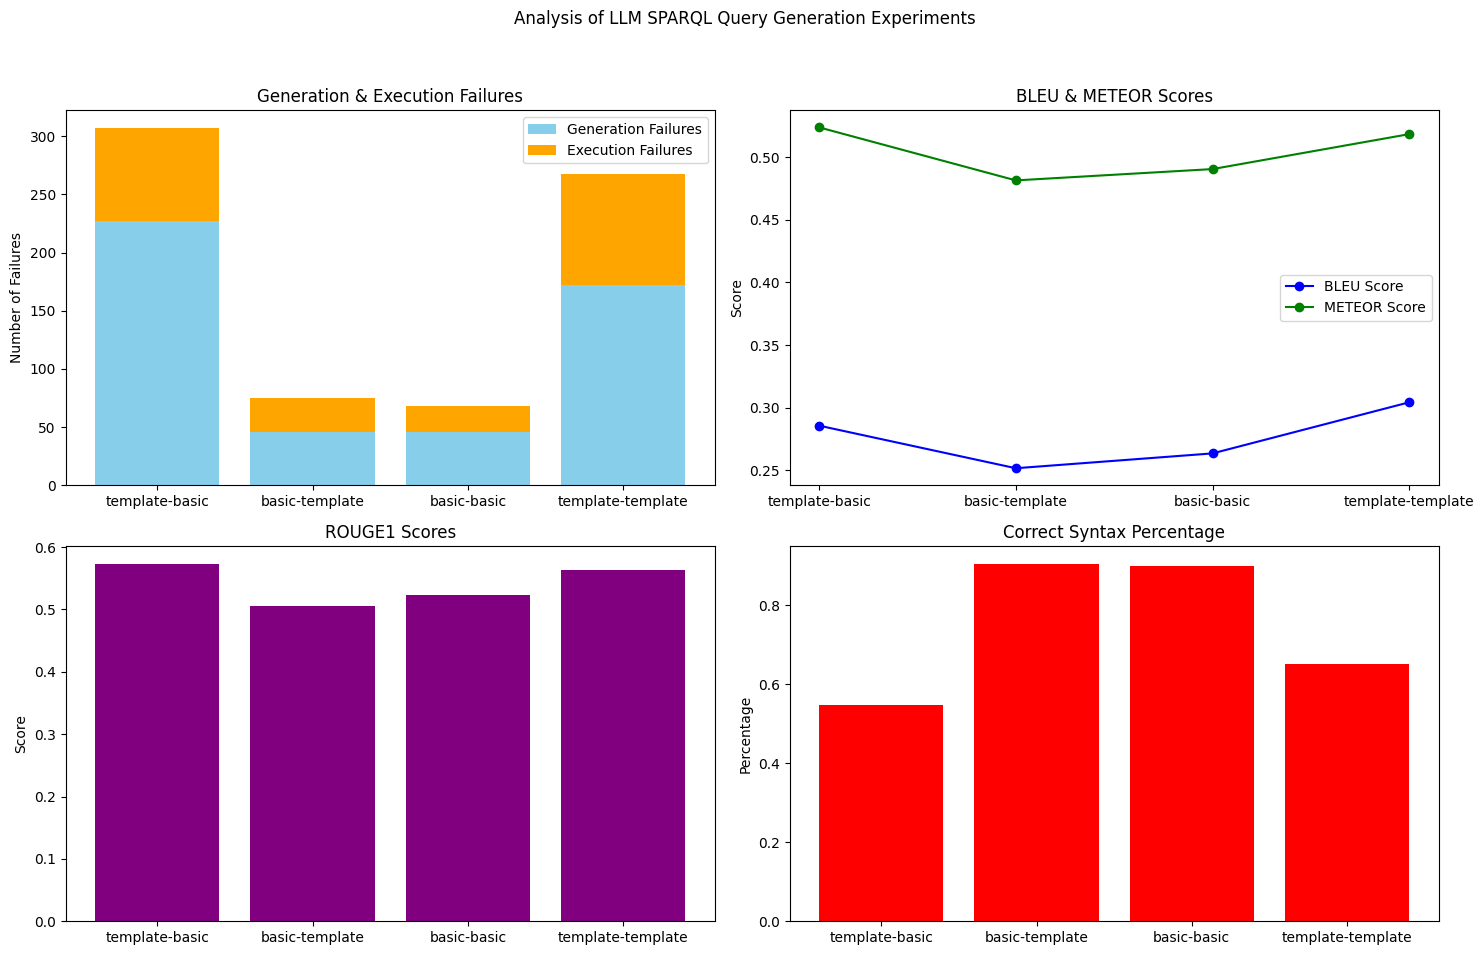

In [27]:

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
axs[0, 0].bar(model_names, df["num_gen_fail"], color='skyblue', label='Generation Failures')
axs[0, 0].bar(model_names, df["num_exec_fail"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
axs[0, 0].set_title('Generation & Execution Failures')
axs[0, 0].set_ylabel('Number of Failures')
axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["bleu_score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
axs[0, 1].plot(model_names, df["meteor_score"], marker='o', linestyle='-', color='green', label='METEOR Score')
axs[0, 1].set_title('BLEU & METEOR Scores')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
axs[1, 0].bar(model_names, df["rouge1"], color='purple')
axs[1, 0].set_title('ROUGE1 Scores')
axs[1, 0].set_ylabel('Score')

# Correct Syntax
axs[1, 1].bar(model_names, df["correct_syntax"], color='red')
axs[1, 1].set_title('Correct Syntax Percentage')
axs[1, 1].set_ylabel('Percentage')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

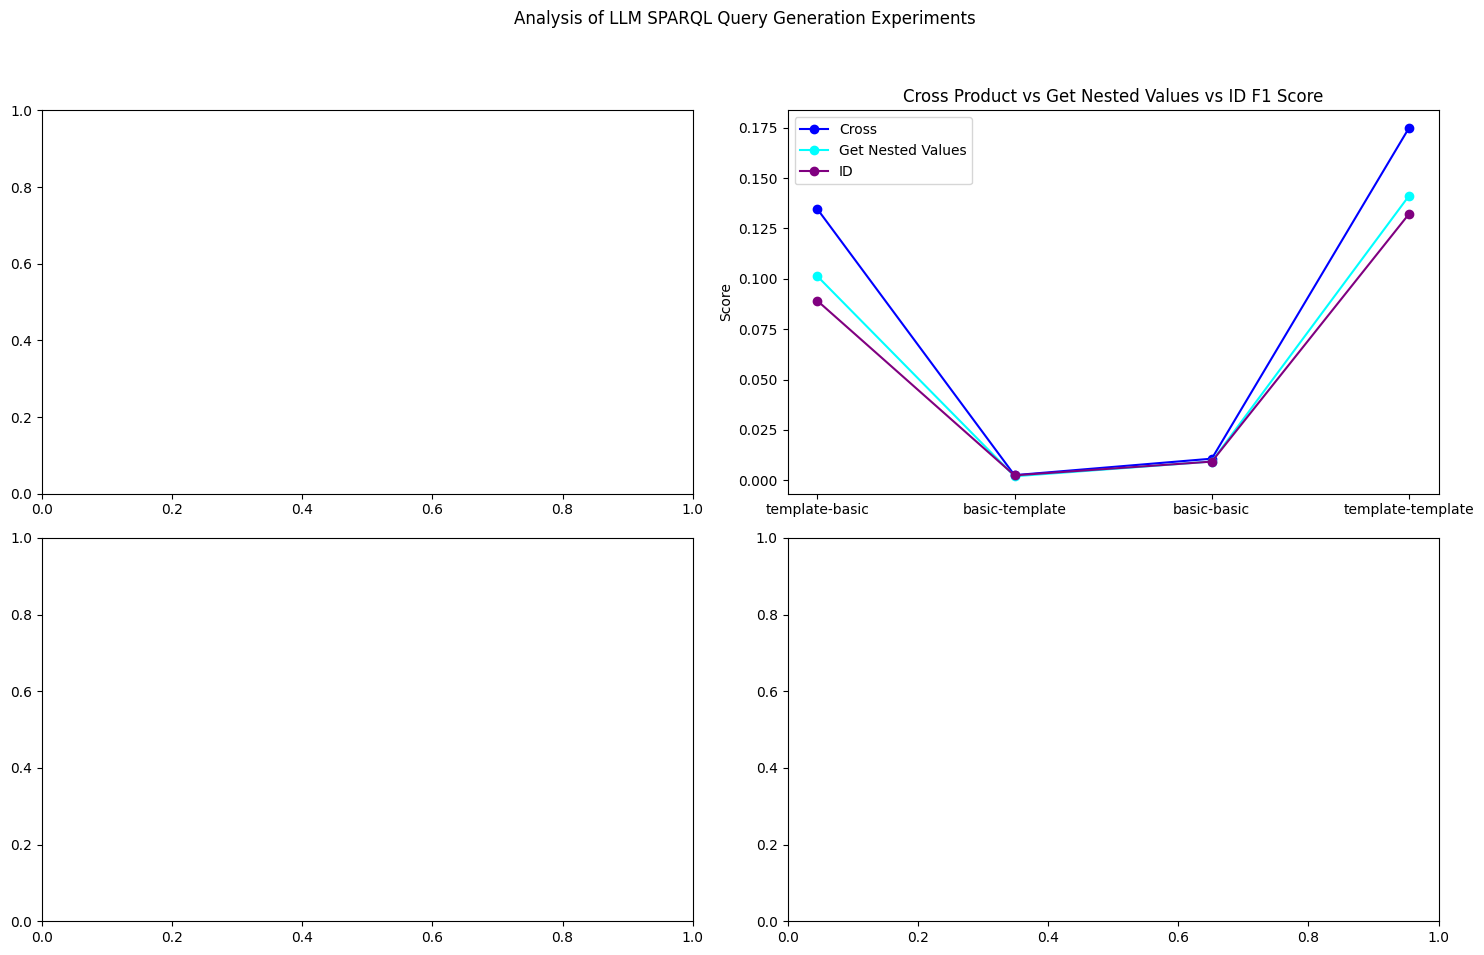

In [28]:
# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
# axs[0, 0].bar(model_names, df["cross_f1score"], color='skyblue', label='Generation Failures')
# axs[0, 0].bar(model_names, df["cross_f1score"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
# axs[0, 0].set_title('Generation & Execution Failures')
# axs[0, 0].set_ylabel('Number of Failures')
# axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["cross_f1score"], marker='o', linestyle='-', color='blue', label='Cross')
axs[0, 1].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='cyan', label='Get Nested Values')
axs[0, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='purple', label='ID')
axs[0, 1].set_title('Cross Product vs Get Nested Values vs ID F1 Score')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 0].set_title('Cross Product F1 Score')
# axs[1, 0].set_ylabel('Score')
# axs[1, 0].legend()

# Correct Syntax
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 1].set_title('Cross Product F1 Score')
# axs[1, 1].set_ylabel('Score')
# axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [29]:
model_data = df.iloc[0]
print(model_data.model_name)

Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-e3-template-basic


In [30]:
exec_path = Path(f'../outputs/batch_run/experiment_basic_vs_template_2/execution/{model_data.model_name}_engpeft-t0.2-topp0.95_executed.parquet.gzip')
if not exec_path.exists():
    raise FileNotFoundError()

In [31]:
df_exec = load_dataset(exec_path)
df_exec.head()

,row,last_executed_step,to_be_executed_step,translated_prompt,extracted_entities,extracted_properties,linked_entities,linked_properties,output,status,has_error,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,,,,,,
895,"""Find pairs of places in America and England w...",SimplePlaceholderFiller,,SELECT ?americanPlace ?americanPlaceLabel ?eng...,"[populated place, United States of America, po...","[instance of, country, instance of, country, n...","[[populated place, [Q3257686, locality]], [Uni...","[[instance of, [P31, instance of]], [country, ...",SELECT ?americanPlace ?americanPlaceLabel ?eng...,,False,"""Find pairs of places in America and England w...","[""Find places in America that have English nam...",SELECT ?placeInAmerica ?placeInEngland ?americ...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,[],PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1716,"""Find cities that have more Wikipedia sitelink...",,LLMTranslator,,None,None,None,None,None,"Unexpected err.msg=""The LLM result doesn't mat...",True,"""Find cities that have more Wikipedia sitelink...","[""Find cities that have more Wikipedia sitelin...",SELECT ?country ?countryLabel ?countrySitelink...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
333,"""Write a SparQL query to retrieve the author, ...",SimplePlaceholderFiller,,SELECT ?author ?authorLabel ?letterLabel ?lett...,"[letter of the alphabet, human]","[instance of, author, Wikisource page, instanc...","[[letter of the alphabet, [letter of the alpha...","[[instance of, [P31, instance of]], [author, [...",SELECT ?author ?authorLabel ?letterLabel ?lett...,,False,"""Write a SparQL query to retrieve the author, ...","[""Write a SparQL query to retrieve the author,...",SELECT ?author ?authorLabel ?letter ?letterLab...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1192,"""Write a SparQL query to retrieve the name, la...",,LLMTranslator,,None,None,None,None,None,"Unexpected err.msg=""The LLM result doesn't mat...",True,"""Write a SparQL query to retrieve the name, la...","[""Write a SparQL query to retrieve the birth p...",SELECT ?person ?personLabel ?taxon ?taxonLabel...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
1518,"""Find the SparQL query to retrieve the name, l...",SimplePlaceholderFiller,,SELECT ?library ?libraryLabel ?location\nWHERE...,"[library, India]","[instance of, country, coordinate location]","[[library, [Q7075, library]], [India, [Q668, I...","[[instance of, [P31, instance of]], [country, ...",SELECT ?library ?libraryLabel ?location\nWHERE...,,False,"""Find the SparQL query to retrieve the name, l...","[""Find and display the labels, locations (if a...",SELECT ?library ?libraryLabel ?coordinate_loca...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,"[{'library': {'type': 'uri', 'value': 'http://...",PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...


In [32]:
def status_error_type(message:str):
    if message == "":
        return "no"
    
    if message.startswith("Unexpected err.msg=\"The LLM result doesn't match desired format.\""):
        return "NoSparqlMatch"
    
    return "other"

def find_libwikidatallm_error_proportions(df:pd.DataFrame):
    return df.status.map(status_error_type)

libwikidatallm_errors_proportions = find_libwikidatallm_error_proportions(df_exec).value_counts()
libwikidatallm_errors_proportions

status
no               286
NoSparqlMatch    227
Name: count, dtype: int64

In [51]:
row_number = 1
row = df_exec.loc[df_exec['has_error']].iloc[row_number]
answer = re.search(r"err.sparql='([\w\s\d\[\]\/\<\>\:,.\"#\\?\{\};\(\)\-*]*)'", row.status)

if answer == None or len(answer.groups()) == 0:
    print(bytes(row.status, "utf-8").decode("unicode_escape"))
    raise IndexError("No answer was found in the status.")

query = re.search(r"\[\/INST\] (.*)", answer.groups()[0])
if query == None or len(query.groups()) == 0:
    raise IndexError("No query was found in the answer.")

query_generated = bytes(query.groups()[0], "utf-8").decode("unicode_escape")
print(query_generated)

PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>

SELECT ?person ?personLabel ?taxon ?taxonLabel ?rank ?rankLabel ?birthplaceLabel ?image WHERE {
?person wdt:[property:taxon named after] ?taxon.
?taxon wdt:[property:taxon rank] ?rank.
OPTIONAL { ?person wdt:[property:place of birth] ?birthplace. }
OPTIONAL { ?person wdt:[property:image] ?image. }
SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY ?personLabel</s>


In [54]:
row_number = 0
row = df_exec.loc[~df_exec['has_error']].iloc[row_number]
print(row.translated_prompt)

SELECT ?americanPlace ?americanPlaceLabel ?englishPlace ?englishPlaceLabel WHERE {
?americanPlace wdt:[property:instance of] wd:[entity:populated place] .
?americanPlace wdt:[property:country] wd:[entity:United States of America] .
?englishPlace wdt:[property:instance of] wd:[entity:populated place] .
?englishPlace wdt:[property:country] wd:[entity:United Kingdom of Great Britain and Ireland] .
?americanPlace wdt:[property:named after] ?englishPlace .
SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}


In [61]:
df_exec.loc[~df_exec['has_error']].loc[df_exec['execution'].str.startswith(('exception'))].head()

,row,last_executed_step,to_be_executed_step,translated_prompt,extracted_entities,extracted_properties,linked_entities,linked_properties,output,status,has_error,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,,,,,,
333,"""Write a SparQL query to retrieve the author, ...",SimplePlaceholderFiller,,SELECT ?author ?authorLabel ?letterLabel ?lett...,"[letter of the alphabet, human]","[instance of, author, Wikisource page, instanc...","[[letter of the alphabet, [letter of the alpha...","[[instance of, [P31, instance of]], [author, [...",SELECT ?author ?authorLabel ?letterLabel ?lett...,,False,"""Write a SparQL query to retrieve the author, ...","[""Write a SparQL query to retrieve the author,...",SELECT ?author ?authorLabel ?letter ?letterLab...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
924,"""Write a query to find directors who have work...",SimplePlaceholderFiller,,SELECT ?director ?directorLabel ?actor ?actorL...,[],"[cast member, director]",[],"[[cast member, [P161, cast member]], [director...",SELECT ?director ?directorLabel ?actor ?actorL...,,False,"""Write a query to find directors who have work...","[""Write a SparQL query to find directors who h...",SELECT ?director ?directorLabel ?actor ?actorL...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1087,"""Find the distinct pairs of adjacent districts...",SimplePlaceholderFiller,,SELECT DISTINCT ?district1 ?district2 WHERE {\...,"[district of Vienna, Vienna]","[instance of, located in the administrative te...","[[district of Vienna, [Q261023, district of Vi...","[[instance of, [P31, instance of]], [located i...",SELECT DISTINCT ?district1 ?district2 WHERE {\...,,False,"""Find the distinct pairs of adjacent districts...","[""Find the names of adjacent districts in Vien...",SELECT DISTINCT ?districtALabel ?districtBLabe...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX wd: <http://www.wikidata.org/entity/>\n...
1381,"""Write a SparQL query to retrieve the name and...",SimplePlaceholderFiller,,SELECT ?country ?countryLabel ?image WHERE {\n...,"[sovereign state, sun]","[instance of, flag image, flag]","[[sovereign state, [Q3624078, sovereign state]...","[[instance of, [P31, instance of]], [flag imag...",SELECT ?country ?countryLabel ?image WHERE {\n...,,False,"""Write a SparQL query to retrieve the name and...","[""Find the labels and images of countries whos...",SELECT ?countryLabel ?image WHERE {\n?item wdt...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
2380,"""Write a SparQL query to retrieve the name, la...",SimplePlaceholderFiller,,SELECT ?journal ?journalLabel ?start_time WHER...,[open access],"[open access publisher ID, start time]","[[open access, [Q232932, open access]]]","[[open access publisher ID, [open access publi...",SELECT ?journal ?journalLabel ?start_time WHER...,,False,"""Write a SparQL query to retrieve the name, la...","[""Write a SparQL query to retrieve the name, l...",SELECT ?journal ?journalLabel ?started\nWHERE ...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
